In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path_google_train = "/content/drive/MyDrive/datasets/Google_Stock_Price_Train.csv"

In [3]:
#required libraries
import numpy as np
import matplotlib.pyplot as plt
import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
%matplotlib inline

In [4]:
df_google_tr = pd.read_csv(path_google_train)

In [5]:
df_google_tr.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
#information about data corelation
df_google_tr.corr()

<ipython-input-6-e7a9eca51f6f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_google_tr.corr()


,Open,High,Low
Open,1.000000,0.999692,0.999498
High,0.999692,1.000000,0.999480
Low,0.999498,0.999480,1.000000


<ipython-input-7-302e705bfcd4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_google_tr.corr(), annot=True, linecolor='black', fmt="0.4f", ax=ax)


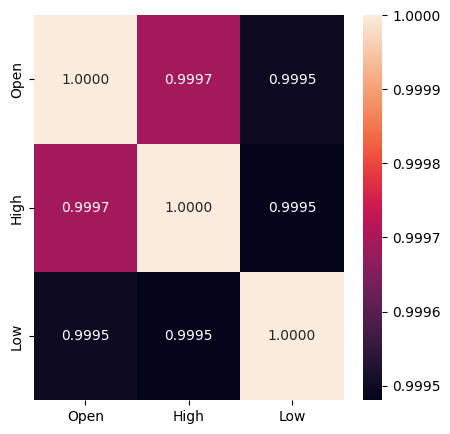

In [7]:
# Visualization of correlation result with seaborn library
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(df_google_tr.corr(), annot=True, linecolor='black', fmt="0.4f", ax=ax)
plt.show()

In [8]:
# seprate the open price data from the data frame df_google_tr
data_set = df_google_tr.loc[:,["Open"]].values
print(data_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [9]:
train = data_set[:len(data_set)-258]
test = data_set[len(train):]

In [10]:
train.reshape(train.shape[0],1)

array([[325.25],
       [331.27],
       [329.83],
       [328.34],
       [322.04],
       [313.7 ],
       [310.59],
       [314.43],
       [311.96],
       [314.81],
       [312.14],
       [319.3 ],
       [294.16],
       [291.91],
       [292.07],
       [287.68],
       [284.92],
       [284.32],
       [287.95],
       [290.41],
       [291.38],
       [291.34],
       [294.23],
       [296.39],
       [302.44],
       [303.18],
       [304.87],
       [302.81],
       [304.11],
       [304.63],
       [305.32],
       [300.28],
       [301.36],
       [300.81],
       [304.84],
       [302.37],
       [302.54],
       [302.16],
       [303.86],
       [308.14],
       [309.97],
       [309.84],
       [309.06],
       [302.89],
       [303.39],
       [303.88],
       [302.84],
       [298.88],
       [303.24],
       [306.35],
       [307.15],
       [309.29],
       [310.4 ],
       [314.28],
       [316.12],
       [318.06],
       [322.09],
       [321.3 ],
       [322.31

In [11]:
train.shape

(1000, 1)

In [12]:
# normalize the train data set values between zero and one
# min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_scaler = scaler.fit_transform(train)

In [13]:
print(train_scaler[0:10])

[[0.09418514]
 [0.10647638]
 [0.10353628]
 [0.1004941 ]
 [0.08763118]
 [0.07060313]
 [0.06425334]
 [0.07209359]
 [0.06705051]
 [0.07286945]]


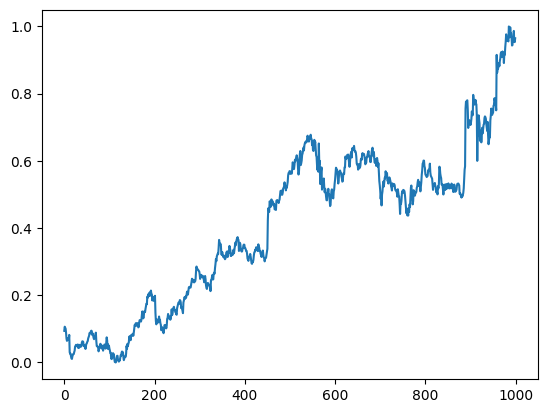

In [14]:
# visualize the train_scaler
plt.plot(train_scaler)
plt.show()

In [15]:
# Create the data
x_train = []
y_train = []
time_steps = 50
for i in range(time_steps,len(train_scaler)):
  x_train.append(train_scaler[i-time_steps:i,0])
  y_train.append(train_scaler[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
# reshape
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [17]:
x_train.shape

(950, 50, 1)

In [18]:
y_train

array([5.72297766e-02, 6.15990853e-02, 6.38654090e-02, 7.17873331e-02,
       7.55441219e-02, 7.95050839e-02, 8.77332680e-02, 8.61202989e-02,
       8.81824493e-02, 9.32663645e-02, 9.46955776e-02, 9.29805219e-02,
       8.18122422e-02, 8.65286455e-02, 7.94438319e-02, 7.31348769e-02,
       6.93168361e-02, 7.44415860e-02, 7.48907673e-02, 8.34252113e-02,
       8.87132998e-02, 6.37429050e-02, 4.90424272e-02, 4.85319940e-02,
       4.61227490e-02, 4.46731185e-02, 3.31169096e-02, 3.85479195e-02,
       4.44076933e-02, 5.14312548e-02, 5.56168075e-02, 5.35546572e-02,
       4.42035199e-02, 4.15696843e-02, 5.01245457e-02, 4.63677570e-02,
       3.52607293e-02, 4.59594103e-02, 4.72865368e-02, 5.35342399e-02,
       5.08799869e-02, 4.11409204e-02, 4.57756544e-02, 5.86181551e-02,
       7.47478460e-02, 6.58663073e-02, 4.08550778e-02, 5.40038385e-02,
       4.20188656e-02, 4.96549471e-02, 4.13655110e-02, 3.60774225e-02,
       2.82984197e-02, 2.88701049e-02, 1.16582956e-02, 1.00657438e-02,
      

In [19]:
#apply RNN model on it
# required import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout 
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
def model_rnn(look_back):
  model=Sequential()
  model.add(SimpleRNN(units=32, input_shape=(look_back,1), activation="relu"))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
  return model

In [21]:
model_google = model_rnn(50)

In [22]:
model_google.fit(x_train, y_train,epochs=100)

Epoch 1/100
30/30 [==============================] - 2s 10ms/step - loss: 0.0797 - mse: 0.0797 - mae: 0.2171
Epoch 2/100
30/30 [==============================] - 0s 9ms/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0605
Epoch 3/100
30/30 [==============================] - 0s 11ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0276
Epoch 4/100
30/30 [==============================] - 0s 11ms/step - loss: 4.4386e-04 - mse: 4.4386e-04 - mae: 0.0146
Epoch 5/100
30/30 [==============================] - 0s 10ms/step - loss: 4.0129e-04 - mse: 4.0129e-04 - mae: 0.0133
Epoch 6/100
30/30 [==============================] - 0s 10ms/step - loss: 3.8275e-04 - mse: 3.8275e-04 - mae: 0.0129
Epoch 7/100
30/30 [==============================] - 0s 9ms/step - loss: 3.7739e-04 - mse: 3.7739e-04 - mae: 0.0130
Epoch 8/100
30/30 [==============================] - 0s 9ms/step - loss: 3.8518e-04 - mse: 3.8518e-04 - mae: 0.0130
Epoch 9/100
30/30 [==============================] - 0s 10ms/step - loss: 3.7479e-04 - mse:

In [23]:
len(test)

258

In [24]:
test_x=[]
test_y = []
time_step = 50
for i in range(50,len(test)):
  test_x.append(test[i-time_step:i,0])
  test_y.append(test[i,0])

In [25]:
test_lbl = test_y

In [26]:
test_x = scaler.fit_transform(test_x)

In [27]:
test_y = scaler.fit_transform(np.array(test_y).reshape(-1,1))

In [28]:
test_y = test_y.reshape(1,-1)

In [29]:
test_x[0:50]

array([[0.65664545, 0.6031746 , 0.62805463, ..., 0.3272927 , 0.30196321,
        0.24643053],
       [0.62658179, 0.62805463, 0.72971576, ..., 0.30196321, 0.24643053,
        0.1207441 ],
       [0.65242733, 0.72971576, 0.80287929, ..., 0.24643053, 0.1207441 ,
        0.18856398],
       ...,
       [0.38983051, 0.3480251 , 0.28829827, ..., 0.31404448, 0.35976112,
        0.31617243],
       [0.36153079, 0.28829827, 0.15311923, ..., 0.35976112, 0.31617243,
        0.28095826],
       [0.29948616, 0.15311923, 0.22606128, ..., 0.31617243, 0.28095826,
        0.26173806]])

In [30]:
test_y[0:50]

array([[0.1207441 , 0.18856398, 0.25480505, 0.33635365, 0.38309995,
        0.38385502, 0.38007963, 0.44927238, 0.48640857, 0.4496156 ,
        0.45620538, 0.48984075, 0.41879462, 0.45160626, 0.43650467,
        0.5429709 , 0.53713619, 0.46403075, 0.54269632, 0.45991214,
        0.44460461, 0.51050247, 0.50089237, 0.49437122, 0.45991214,
        0.5365184 , 0.56981054, 0.56960461, 0.61408567, 0.67620813,
        0.59719934, 0.57921472, 0.37959912, 0.30958265, 0.37355848,
        0.24910763, 0.25576606, 0.1352279 , 0.18279791, 0.177581  ,
        0.13378638, 0.18327842, 0.18794618, 0.28143877, 0.31404448,
        0.35976112, 0.31617243, 0.28095826, 0.26173806, 0.30882757,
        0.22425865, 0.21526634, 0.21018671, 0.24389072, 0.24615596,
        0.34157057, 0.35605437, 0.36387974, 0.41694124, 0.43609281,
        0.42215815, 0.39998627, 0.37005766, 0.33525535, 0.36353652,
        0.35605437, 0.33271554, 0.31239703, 0.3121911 , 0.32948929,
        0.30141406, 0.25844316, 0.19062328, 0.18

In [31]:
# convert in to array
test_x,test_y = np.array(test_x),np.array(test_y)

In [32]:
test_x = np.reshape(test_x,(test_x.shape[0],test_x.shape[1],1))

In [33]:
predict_price = model_google.predict(test_x)

7/7 [==============================] - 0s 4ms/step


In [34]:
predicted_stock_price = scaler.inverse_transform(predict_price)

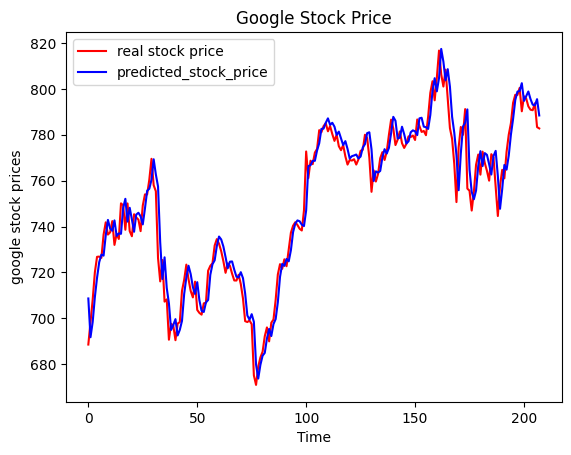

In [35]:
# Visualising the results
plt.plot(test_lbl, color='Red', label= "real stock price")
plt.plot(predicted_stock_price, color='Blue', label="predicted_stock_price")
plt.title("Google Stock Price")
plt.xlabel("Time")
plt.ylabel("google stock prices")
plt.legend()
plt.show()